In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("Features/Features_20201109.csv")
print(data.head)

<bound method NDFrame.head of         tempRMS_S1  tempRMS_S2   tempZCR_S1    tempZCR_S2  tempCent_S1  \
0         0.094859    0.182528   822.333333    545.666667     0.240655   
1         0.088845    0.087462   912.000000    611.333333    -0.143705   
2         0.092669    0.069153   861.000000    720.666667     0.490924   
3         0.096996    0.072105   792.000000    832.333333     0.926613   
4         0.090164    0.067022   830.666667    999.000000     0.573376   
5         0.092095    0.061067   861.333333    980.666667    -3.166791   
6         0.100100    0.067198   876.333333    843.666667     0.005263   
7         0.103424    0.082434   788.333333    686.000000     0.649789   
8         0.111225    0.086428   628.666667    599.333333     1.062930   
9         0.108735    0.085106   610.000000    563.333333    -1.148964   
10        0.080488    0.076113   912.666667    745.333333     1.124746   
11        0.074950    0.068547  1024.666667    900.333333     0.628710   
12      

In [2]:
column_headers = list(data.columns.values)
print(column_headers)
print(len(column_headers)) 

['tempRMS_S1', 'tempRMS_S2', 'tempZCR_S1', 'tempZCR_S2', 'tempCent_S1', 'tempCent_S2', 'tempSpread_S1', 'tempSpread_S2', 'tempSkew_S1', 'tempSkew_S2', 'tempKurt_S1', 'tempKurt_S2', 'tempabsMAX_S1', 'tempabsMax_S2', 'tempabsMIN_S1', 'tempabsMIN_S2', 'tempCorrSens', 'tempCohSens', 'specCent_S1', 'specCent_S2', 'specCrest_S1', 'specCrest_S2', 'specDec_S1', 'specDec_S2', 'specEntr_S1', 'specEntr_S2', 'specFlat_S1', 'specFlat_S2', 'specFlux_S1', 'specFlux_S2', 'specKurt_S1', 'specKurt_S2', 'specRoll_S1', 'specRoll_S2', 'specSkew_S1', 'specSkew_S2', 'specSlope_S1', 'specSlope_S2', 'specSpread_S1', 'specSpread_S2', 'specabsMAX_S1', 'specabsMAX_S2', 'specfMAX_S1', 'specfMAX_S2']
44


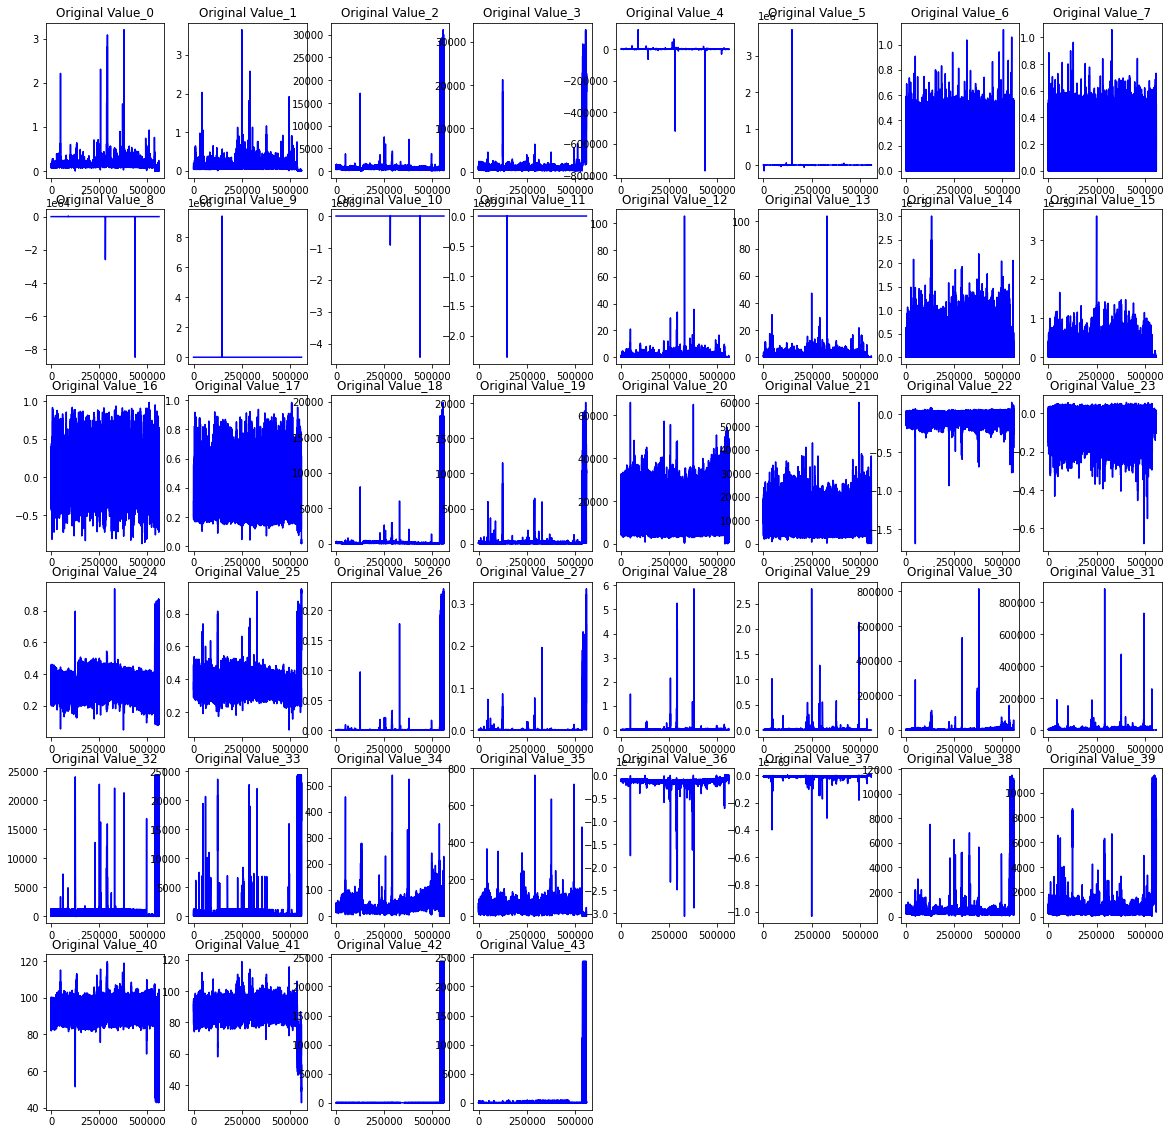

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

for i in range(len(column_headers)):
    plt.subplot(6,8,i+1)
    plt.plot(range(len(data)),data.iloc[:,i],'b')
    plt.title('Original Value_'+str(i))
plt.show()

In [ ]:
# 6，7的数据过于密集，数据差距不大
# 14存在一些小问题
# 16，17数据也像声波
# 20数据能体现出趋势

# 6, 7 data is too dense, the data gap is not big
#14 There are some minor issues
# 16, 17 data is also like sound waves
# 20 data can reflect trends

In [45]:
# Pick one data every 319; 559845/319=1755

begin = 10
data_sample = data.iloc[begin:begin+1]

for i in range(1,1755):
    df_cache = data.iloc[begin+i*319:begin+i*319+1]
    data_sample = pd.concat([data_sample,df_cache])

print(data_sample.shape)

(1755, 44)


In [3]:
# compare the correlation of the data
# 0.8<=|r|<1: high correlation; 0.3<=|r|<0.8: middle correlation
data_S = data.copy()
for column in data:
    if column.endswith('s'):
        data_S.drop(columns=column, inplace=True)
print(data_S.shape)


d = data_S.corr()
print(d)
x = np.array(d)

(559845, 42)
               tempRMS_S1  tempRMS_S2  tempZCR_S1  tempZCR_S2  tempCent_S1  \
tempRMS_S1       1.000000    0.621626   -0.492405   -0.501497     0.000012   
tempRMS_S2       0.621626    1.000000   -0.360969   -0.402011     0.000193   
tempZCR_S1      -0.492405   -0.360969    1.000000    0.929437     0.000218   
tempZCR_S2      -0.501497   -0.402011    0.929437    1.000000     0.000174   
tempCent_S1      0.000012    0.000193    0.000218    0.000174     1.000000   
tempCent_S2     -0.000461   -0.000234   -0.000156   -0.000291     0.000003   
tempSpread_S1    0.003434   -0.000932   -0.005068   -0.005767     0.001354   
tempSpread_S2    0.005003    0.004062   -0.012631   -0.013437    -0.002164   
tempSkew_S1     -0.000296    0.000004    0.000290    0.000241     0.940841   
tempSkew_S2     -0.000504   -0.000317   -0.000139   -0.000261     0.000003   
tempKurt_S1     -0.000394   -0.000123    0.000285    0.000239     0.909235   
tempKurt_S2      0.000504    0.000318    0.000139  

In [4]:
i,j = 0,0
len_S = len(list(data_S.columns.values))
del_list = []
for i in range(len_S):
    for j in range(i+1,len_S):
        if abs(data_S.iloc[:,i].corr(data_S.iloc[:,j])) > 0.6:
            del_list.append(j)
        
print(del_list)   

[1, 34, 38, 39, 33, 34, 35, 39, 3, 16, 17, 22, 23, 24, 25, 30, 31, 36, 37, 38, 39, 40, 16, 17, 22, 23, 24, 25, 30, 31, 36, 37, 38, 39, 8, 10, 9, 11, 10, 11, 13, 17, 22, 23, 24, 25, 30, 31, 36, 37, 38, 39, 40, 22, 23, 24, 25, 30, 31, 36, 37, 38, 39, 41, 22, 23, 24, 25, 30, 31, 36, 38, 24, 25, 30, 31, 36, 37, 38, 39, 25, 30, 31, 36, 37, 38, 39, 30, 31, 36, 37, 38, 39, 35, 32, 33, 31, 36, 37, 38, 39, 36, 37, 38, 39, 39, 38, 39, 37, 38, 39, 38, 39, 39]


In [5]:
from collections import Counter
result = Counter(del_list).most_common(27)
result = np.array(result)
# print(result)
print(result[:,0])

del_arr = sorted(result[:,0])
print(del_arr)

data_S0 = data_S.copy()
data_S0.drop(data_S0.columns[[del_arr]], axis=1, inplace=True)
print(data_S0.shape)

[39 38 36 37 31 30 25 24 22 23 17 34 33 35 16 40 10 11  1  3  8  9 13 41
 32]
[1, 3, 8, 9, 10, 11, 13, 16, 17, 22, 23, 24, 25, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
(559845, 17)


/Users/goffery/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:2081: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [6]:
column_headers0 = list(data_S0.columns.values)
print(column_headers0)
print(len(column_headers0))

['tempRMS_S1', 'tempZCR_S1', 'tempCent_S1', 'tempCent_S2', 'tempSpread_S1', 'tempSpread_S2', 'tempabsMAX_S1', 'tempabsMIN_S1', 'tempabsMIN_S2', 'specCrest_S1', 'specCrest_S2', 'specDec_S1', 'specDec_S2', 'specFlux_S1', 'specFlux_S2', 'specKurt_S1', 'specKurt_S2']
17


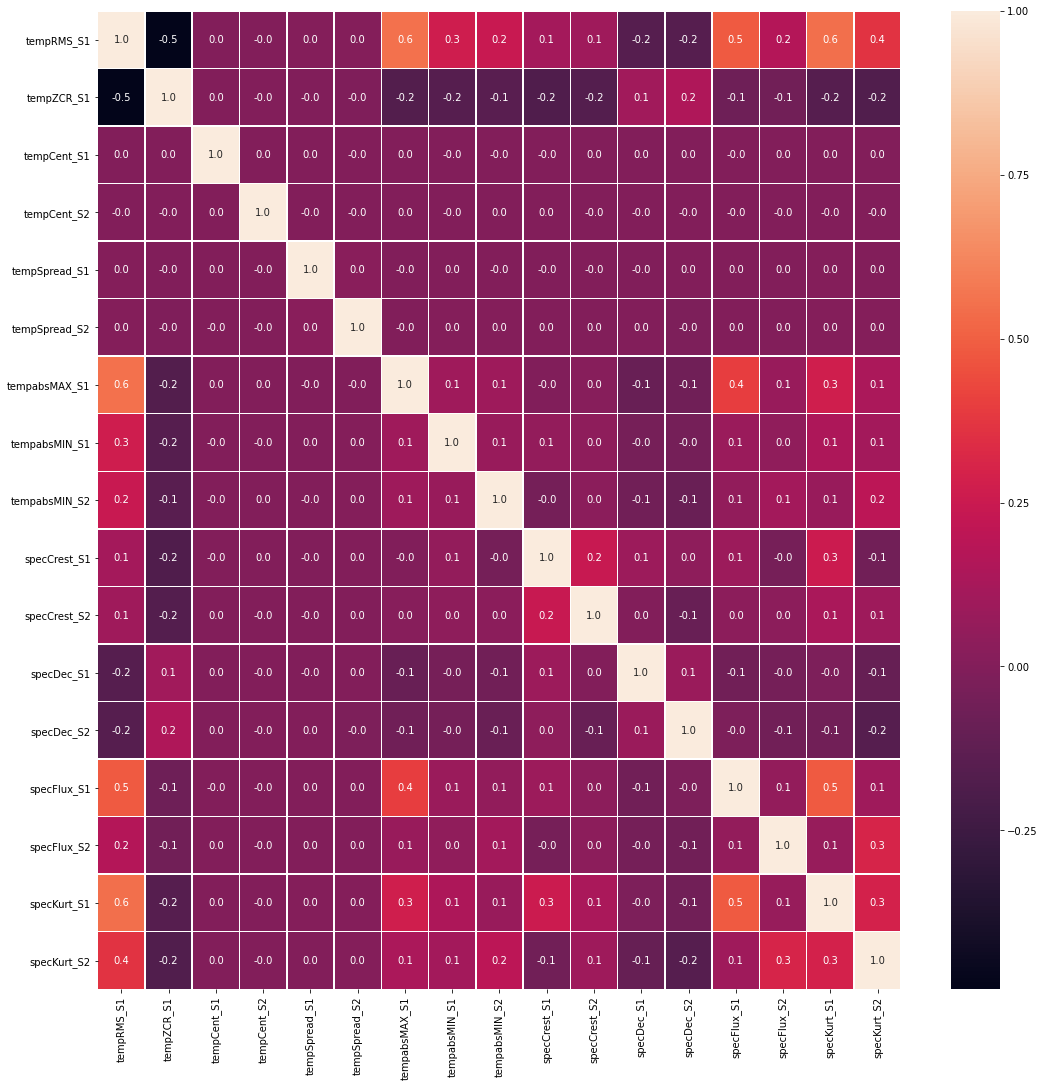

In [8]:
# data visualization
# correlation map
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(figsize=(18, 18))

sns.heatmap(data_S0.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

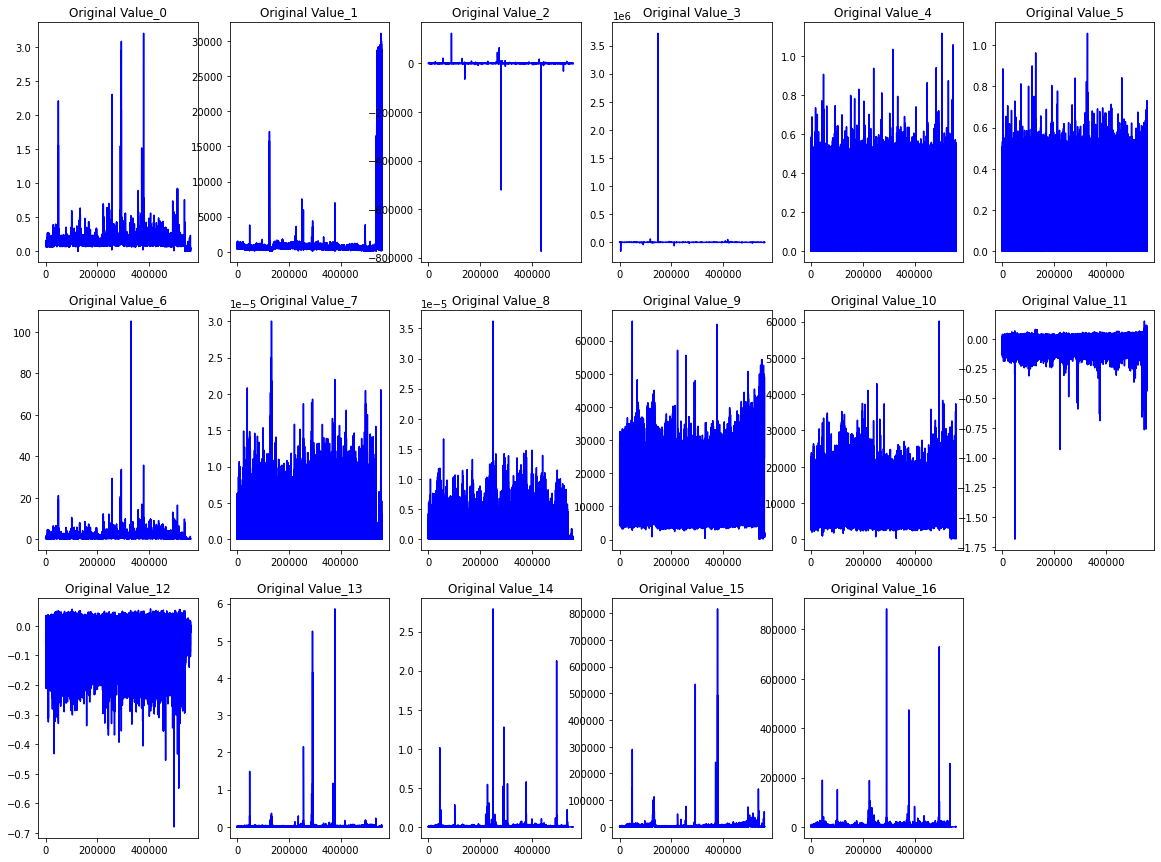

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

for i in range(len(column_headers0)):
    plt.subplot(3,6,i+1)
    plt.plot(range(len(data_S0)),data_S0.iloc[:,i],'b')
    plt.title('Original Value_'+str(i))
plt.show()

In [7]:
# data split
train_data_concat = data_S0.iloc[0:20000,:]
test_data_concat = data_S0.iloc[20000:30000,:]

for k in range(13):
    train_data_concat = pd.concat([train_data_concat ,data_S0.iloc[(30000+k*40000):(60000+k*40000),:]])
    test_data_concat = pd.concat([test_data_concat ,data_S0.iloc[(60000+k*40000):(70000+k*40000),:]])

train_data_concat = pd.concat([train_data_concat ,data_S0.iloc[550000:,:]])

print(train_data_concat.shape)
print(test_data_concat.shape)

(419845, 17)
(140000, 17)


In [8]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# scalers = StandardScaler()
mms = MinMaxScaler(feature_range=(-1, 1))
train_data_scaled = mms.fit_transform(train_data_concat)
test_data_scaled = mms.transform(test_data_concat)

print(train_data_scaled.shape)
print(test_data_scaled.shape)

(419845, 17)
(140000, 17)


In [9]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# scalers = StandardScaler()
mms = MinMaxScaler(feature_range=(-1, 1))
train_data_scaled_1 = mms.fit_transform(data_S0)
print(train_data_scaled_1.shape)

(559845, 17)


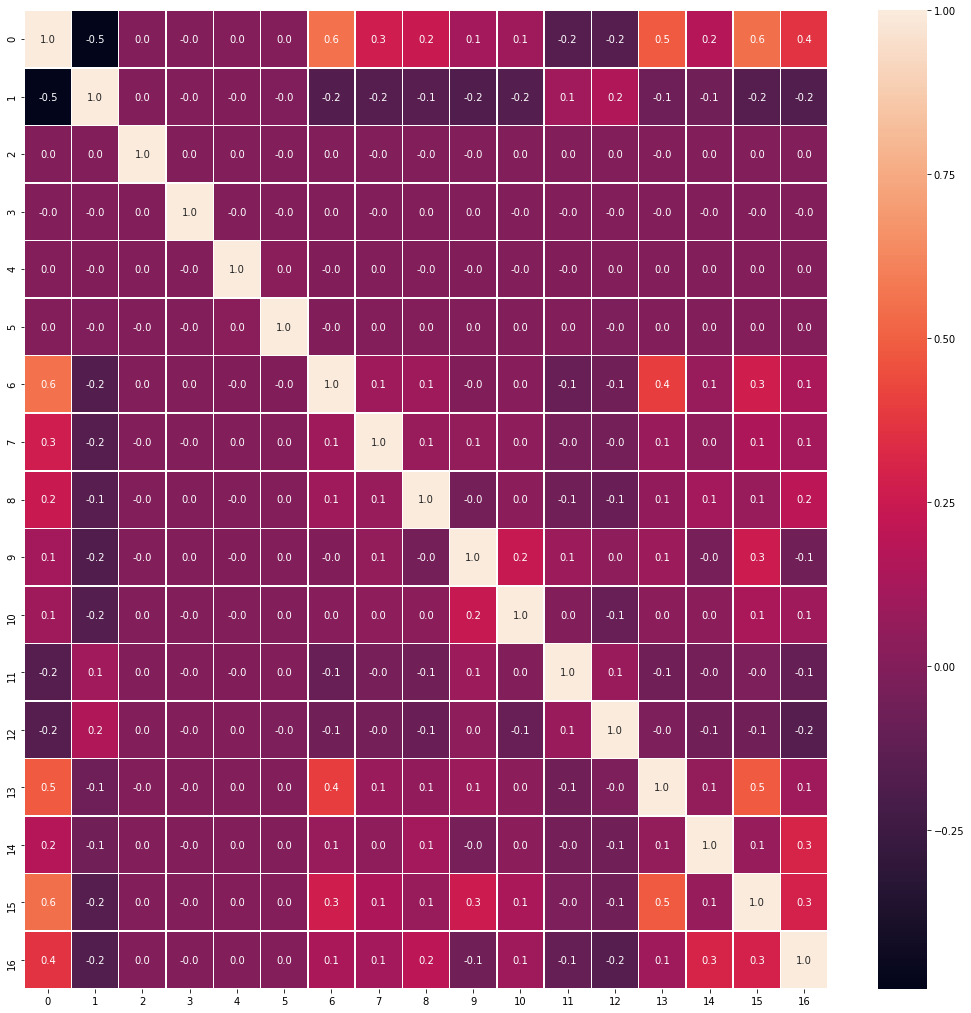

In [11]:
# data visualization
# correlation map
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

f,ax = plt.subplots(figsize=(18, 18))
train_data_scaled_1 = pd.DataFrame(train_data_scaled_1)

sns.heatmap(train_data_scaled_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [9]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# scalers = StandardScaler()
mm_s = MinMaxScaler(feature_range=(-1, 1))
all_data_scaled = mm_s.fit_transform(data)


print(all_data_scaled.shape)

(559845, 44)


In [11]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# scalers = StandardScaler()
mm_s = MinMaxScaler(feature_range=(-1, 1))
half_data_scaled = mm_s.fit_transform(data_S0.iloc[:,0:2])


print(half_data_scaled.shape)

(559845, 2)


In [20]:
# Split the data set into S1 and S2
data_S1 = data.copy()
data_S2 = data.copy()
for column in data:
    if column.endswith('2') or column.endswith('s'):
        data_S1.drop(columns=column, inplace=True)
    if column.endswith('1') or column.endswith('s'):
        data_S2.drop(columns=column, inplace=True)

print(data_S1.shape)   # [559845 rows x 21 columns]
print(data_S2.shape)   # [559845 rows x 21 columns]

mm_s = MinMaxScaler(feature_range=(-1, 1))
half_data_scaled = mm_s.fit_transform(data_S1)
print(half_data_scaled.shape)

(559845, 21)
(559845, 21)
(559845, 21)


In [10]:
len(train_data_scaled)

419845

In [27]:
# AutoEncoder
from keras.datasets import mnist
from keras.models import Model # Generic model
from keras.layers import Dense, Input

# x_train = train_data_scaled
# x_test = test_data_scaled
# x_all = all_data_scaled
x_half = half_data_scaled

# compress feature dimensions to 2 dimensions
# 3 dimensions
encoding_dim = 5
 
# this is our input placeholder
input_seq = Input(shape=(21,))
 
# encoding layer
encoded = Dense(8, activation='relu')(input_seq)
# encoded = Dense(16, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)
 
# decoding layer
decoded = Dense(8, activation='relu')(encoder_output)
# decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(21, activation='tanh')(decoded)
 
# Build a self-encoding model
autoencoder = Model(inputs=input_seq, outputs=decoded)
 
# Build a coding model
encoder = Model(inputs=input_seq, outputs=encoder_output)
 
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
 
# training
autoencoder.fit(x_half, x_half, epochs=50, batch_size=256, shuffle=True, verbose=2)
 

Epoch 1/50
 - 4s - loss: 0.0404
Epoch 2/50
 - 3s - loss: 0.0029
Epoch 3/50
 - 3s - loss: 0.0025
Epoch 4/50
 - 3s - loss: 0.0023
Epoch 5/50
 - 3s - loss: 0.0019
Epoch 6/50
 - 3s - loss: 0.0013
Epoch 7/50
 - 3s - loss: 8.6819e-04
Epoch 8/50
 - 3s - loss: 7.5122e-04
Epoch 9/50
 - 3s - loss: 6.9812e-04
Epoch 10/50
 - 3s - loss: 5.6594e-04
Epoch 11/50
 - 3s - loss: 4.5868e-04
Epoch 12/50
 - 3s - loss: 4.3765e-04
Epoch 13/50
 - 3s - loss: 4.2275e-04
Epoch 14/50
 - 3s - loss: 4.1035e-04
Epoch 15/50
 - 3s - loss: 4.0031e-04
Epoch 16/50
 - 3s - loss: 3.9130e-04
Epoch 17/50
 - 3s - loss: 3.8377e-04
Epoch 18/50
 - 3s - loss: 3.7670e-04
Epoch 19/50
 - 3s - loss: 3.7005e-04
Epoch 20/50
 - 3s - loss: 3.6115e-04
Epoch 21/50
 - 3s - loss: 3.4506e-04
Epoch 22/50
 - 4s - loss: 3.3762e-04
Epoch 23/50
 - 3s - loss: 3.3323e-04
Epoch 24/50
 - 4s - loss: 3.2971e-04
Epoch 25/50
 - 3s - loss: 3.2585e-04
Epoch 26/50
 - 3s - loss: 3.2191e-04
Epoch 27/50
 - 3s - loss: 3.1687e-04
Epoch 28/50
 - 3s - loss: 3.1322e-

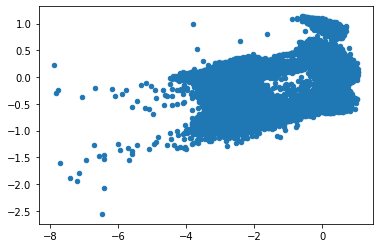

In [29]:
import matplotlib.pyplot as plt

# plotting
encoded_seq = encoder.predict(x_half)
plt.scatter(encoded_seq[:, 0], encoded_seq[:, 1], s=20)  #s:size of points
#plt.colorbar()
plt.show()

In [13]:
np.save("encoded_seq.npy",encoded_seq)

In [11]:
import pandas as pd
import numpy as np

encoded_seq = np.load("encoded_seq.npy")

In [ ]:
# DBSCAN -  use t-SNE to plot
from sklearn.cluster import DBSCAN
# import matplotlib.pyplot as plt

y_pred = DBSCAN().fit_predict(encoded_seq) 
# eps = 0.4,min_samples = 2
# default: eps = 0.5, min_samples = 5
plt.scatter(encoded_seq[:, 0], encoded_seq[:, 1], c=y_pred)
plt.colorbar()
plt.show()

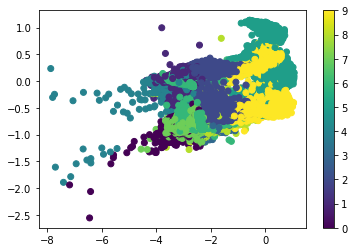

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Num_cluster = 10

y_pred = KMeans(n_clusters=Num_cluster, random_state=9).fit_predict(encoded_seq)
plt.scatter(encoded_seq[:, 0], encoded_seq[:, 1], c=y_pred)
plt.colorbar()
plt.show()

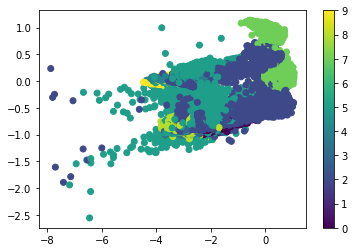

In [58]:
# GMM 
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

Num_components = 10

gmm = GaussianMixture(n_components=Num_components, covariance_type='full', random_state=0)
gmm.fit(encoded_seq)
y_pred = gmm.predict(encoded_seq)
plt.scatter(encoded_seq[:, 0], encoded_seq[:, 1], c=y_pred)
plt.colorbar()
plt.show()

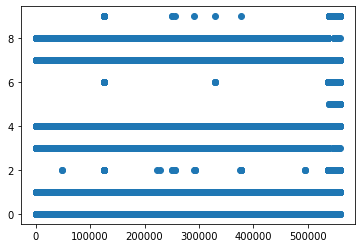

In [35]:
import matplotlib.pyplot as plt

plt.scatter(range(encoded_seq.shape[0]), y_pred)
plt.show()

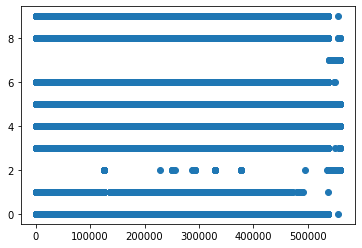

In [59]:
import matplotlib.pyplot as plt

plt.scatter(range(encoded_seq.shape[0]), y_pred)
plt.show()

In [26]:
dataframe = pd.DataFrame({'index_name':y_pred})
dataframe.to_csv("index.csv",index=False,sep=',')

In [40]:
print(y_pred[1])

4


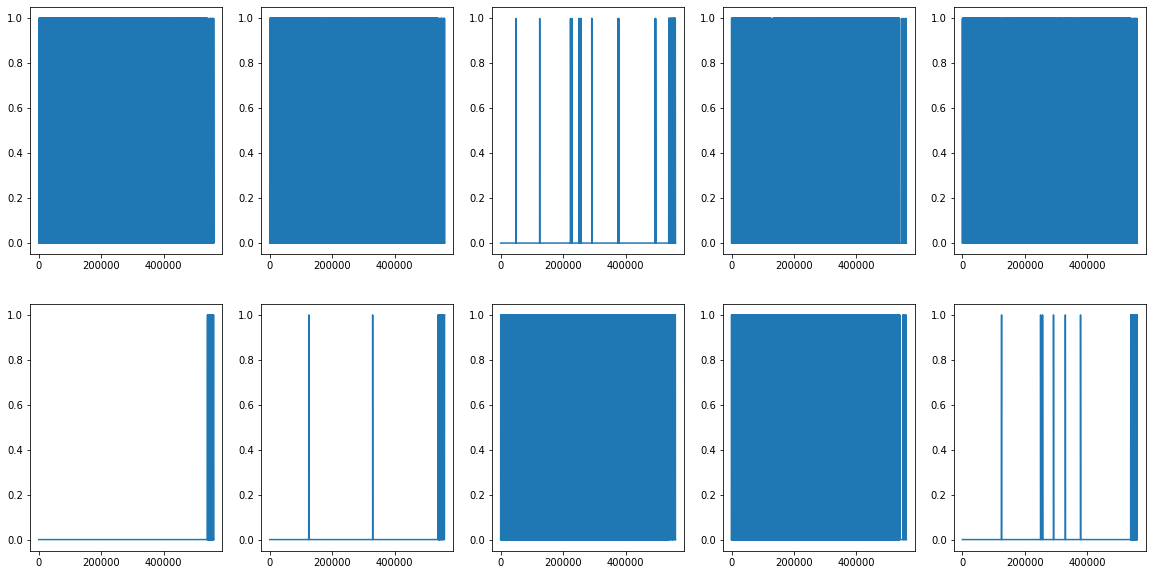

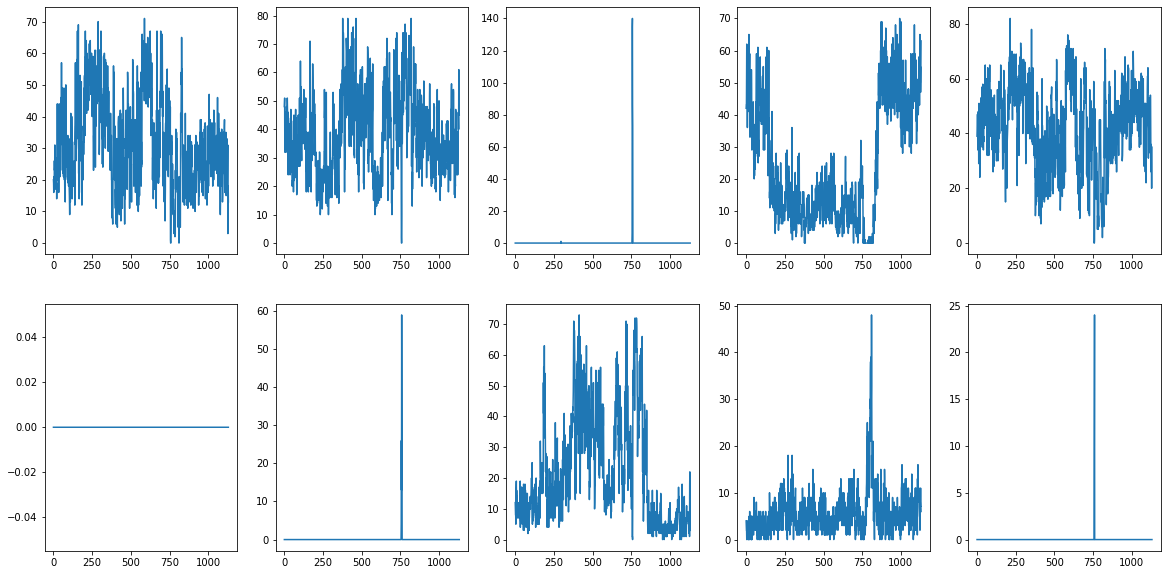

In [55]:
# plot the frequency
idx = y_pred
idx_val = np.zeros((10,len(idx)))
for ii in range(len(idx)):
    if idx[ii] == 0:
        idx_val[0,ii] = 1
    elif idx[ii] == 1:
        idx_val[1,ii] = 1
    elif idx[ii] == 2:
        idx_val[2,ii] = 1
    elif idx[ii] == 3:
        idx_val[3,ii] = 1
    elif idx[ii] == 4:
        idx_val[4,ii] = 1
    elif idx[ii] == 5:
        idx_val[5,ii] = 1
    elif idx[ii] == 6:
        idx_val[6,ii] = 1
    elif idx[ii] == 7:
        idx_val[7,ii] = 1
    elif idx[ii] == 8:
        idx_val[8,ii] = 1
    elif idx[ii] == 9:
        idx_val[9,ii] = 1

idx_num = np.zeros((10,int(len(idx)/495)))
# 559845 = 3*3*3*5*11*13*29
for kk in range(int(len(idx)/495)):
    idx_num[0,kk] = np.sum(idx_val[0,kk*165:(kk+1)*165] == 1)
    idx_num[1,kk] = np.sum(idx_val[1,kk*165:(kk+1)*165] == 1)
    idx_num[2,kk] = np.sum(idx_val[2,kk*165:(kk+1)*165] == 1)
    idx_num[3,kk] = np.sum(idx_val[3,kk*165:(kk+1)*165] == 1)
    idx_num[4,kk] = np.sum(idx_val[4,kk*165:(kk+1)*165] == 1)
    idx_num[5,kk] = np.sum(idx_val[5,kk*16:(kk+1)*165] == 1)
    idx_num[6,kk] = np.sum(idx_val[6,kk*165:(kk+1)*165] == 1)
    idx_num[7,kk] = np.sum(idx_val[7,kk*165:(kk+1)*165] == 1)
    idx_num[8,kk] = np.sum(idx_val[8,kk*165:(kk+1)*165] == 1)
    idx_num[9,kk] = np.sum(idx_val[9,kk*165:(kk+1)*165] == 1)

plt.figure(figsize=(20, 10))
for jj in range(10):
    plt.subplot(2,5,jj+1)
    plt.plot(range(len(idx_val[jj,:])),idx_val[jj,:])
plt.show()    

plt.figure(figsize=(20, 10))
for jj in range(10):
    plt.subplot(2,5,jj+1)
    plt.plot(range(len(idx_num[jj,:])),idx_num[jj,:])
plt.show()